In [49]:
import os
from vscworkflows.tools.optics import DielTensor

import matplotlib, tikzplotlib
matplotlib.rcParams['text.usetex'] = True

import matplotlib.pyplot as plt
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

figures_dir = "../../figures/slme"

In [47]:
diel = DielTensor.from_file("data/CuInSe2_nedos6000.xml")

/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:155: UserWarning: Float overflow (*******) encountered in vasprun
  warnings.warn('Float overflow (*******) encountered in vasprun')


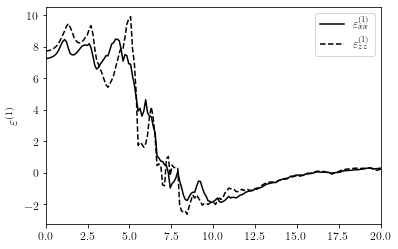

In [56]:
fig, ax = plt.subplots()

ax.plot(diel.energies[::5], diel.dielectric_tensor[::5, 0, 0].real, "k")
ax.plot(diel.energies[::5], diel.dielectric_tensor[::5, 2, 2].real, "k--")
ax.set_xlim([0, 20])
ax.legend([r"$\varepsilon^{(1)}_{xx}$", r"$\varepsilon^{(1)}_{zz}$"])
ax.set_ylabel(r"$\varepsilon^{(1)}$")

tikzplotlib.save(filepath=os.path.join(figures_dir, "diel_CuInSe2_real.tex"), 
                 add_axis_environment=False)

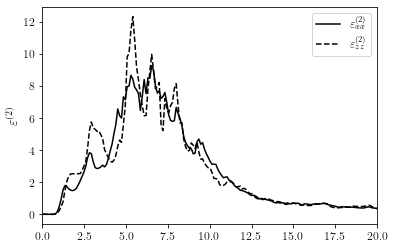

In [57]:
fig, ax = plt.subplots()

ax.plot(diel.energies[::5], diel.dielectric_tensor[::5, 0, 0].imag, "k")
ax.plot(diel.energies[::5], diel.dielectric_tensor[::5, 2, 2].imag, "k--")
ax.set_xlim([0, 20])
ax.legend([r"$\varepsilon^{(2)}_{xx}$", r"$\varepsilon^{(2)}_{zz}$"])
ax.set_ylabel(r"$\varepsilon^{(2)}$")

tikzplotlib.save(filepath=os.path.join(figures_dir, "diel_CuInSe2_imag.tex"), 
                 add_axis_environment=False)

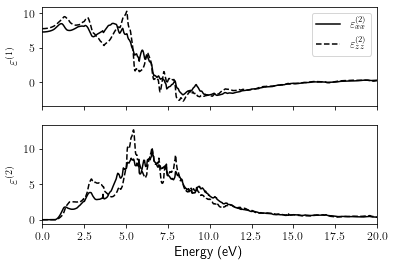

In [48]:
font_dict = {"size": 16}

fig, ax = plt.subplots(2, sharex=True)

ax[0].plot(diel.energies, diel.dielectric_tensor[:, 0, 0].real, "k")
ax[0].plot(diel.energies, diel.dielectric_tensor[:, 2, 2].real, "k--")
ax[0].set_xlim([0, 20])
ax[0].legend([r"$\varepsilon^{(1)}_{xx}$", r"$\varepsilon^{(1)}_{zz}$"])
ax[0].set_ylabel(r"$\varepsilon^{(1)}$")

ax[1].plot(diel.energies, diel.dielectric_tensor[:, 0, 0].imag, "k")
ax[1].plot(diel.energies, diel.dielectric_tensor[:, 2, 2].imag, "k--")
ax[1].set_xlim([0, 20])
ax[0].legend([r"$\varepsilon^{(2)}_{xx}$", r"$\varepsilon^{(2)}_{zz}$"])
ax[1].set_ylabel(r"$\varepsilon^{(2)}$")
ax[1].set_xlabel(r"Energy (eV)")

plt.savefig(fname=os.path.join(figures_dir, "diel_CuInSe2.png"), dpi=300)